In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mydataas1/DATASET.xlsx
/kaggle/input/assign1/DATASET.xlsx - dataset road.csv


In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import catboost as cb
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_excel("../input/mydataas1/DATASET.xlsx",header=None)
df1=pd.read_excel("../input/mydataas1/DATASET.xlsx")

ls=[]
for i in range(0,len(df),10):
    df_temp=pd.DataFrame(columns=df1.columns)
    j=1
    #print(j,df.iloc[i+j,1])
    while(j==df.iloc[i+j,1]):
        df_temp.loc[len(df_temp)]=df.iloc[i+j,:].values
        j+=1
    while(i+j-1<len(df) and j==df.iloc[i+j-1,1]):
        df_temp.loc[len(df_temp)]=df.iloc[i+j-1,:].values
        j+=1
    j=1
    ls.append(df_temp)

In [10]:
X=[]
j=1
for i in ls:
    if len(i)==9:
        x=len(i.index)-1
        y=i.loc[len(i.index)-1]
        i.loc[len(i.index)-1] =i.mean()
        i.iloc[x,1]=10
        i.loc[len(i.index)]=y
    i.iloc[:,0]=j
    j+=1
    X.append(i.iloc[:,1:].astype(float))

In [11]:
X[0]

year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  Para-8  \
0   1.0   324.0   354.5    17.0     0.0     3.0   117.0  2600.0   400.0   
1   2.0   324.0   161.1    18.2     0.0     4.0   106.0  5950.0  1190.0   
2   3.0   324.0   170.7    18.5     0.0     4.0   110.0  5950.0  1190.0   
3   4.0   324.0   223.9    18.9     0.0     3.0   110.0  6150.0  1340.0   
4   5.0   324.0   228.2    18.4     0.0     2.0   113.0  6340.0  1450.0   
5   6.0   324.0   225.0    17.2     0.0     4.0   114.0  6630.0  1500.0   
6   7.0   324.0   130.0    18.4     0.0     3.0   103.0  6700.0  1540.0   
7   8.0   324.0   100.6    19.0     0.0     2.0   114.0  6740.0  1590.0   
8   9.0   324.0   176.5    19.0     0.0     3.0   108.0  7175.0  1787.0   
9  10.0   324.0    53.6    19.0     0.0     2.0   105.0  7567.0  1885.0   

   Para-9  Para-10  Para-11  Para-12  Para-13  
0     0.0      0.0      0.0      0.0     1.52  
1     0.0      3.4      0.0      0.0     1.62  
2     0.0     21.3      0.0      4.0     1.68  
3     0.0     21.3      0.0      5.0     1.78  
4     0.0     23.9      0.0      7.0     1.80  
5     0.0     24.9      0.0      7.0     1.81  
6     0.9     25.2      0.0      7.0     1.86  
7     0.9     52.8      0.0      8.0     1.89  
8     3.4     60.5     57.0      8.0     1.92  
9    16.8    105.0     65.0      9.0     1.96

In [12]:
def find_value(X,i):
    
    model1=XGBRegressor(n_estimators=20,eval_metric=mean_squared_error)
    model1.fit(X.iloc[:9,:i],X.iloc[:9,i])
    pred1=model1.predict(X.iloc[9:10,:i])
    model2_sub = lgb.LGBMRegressor()
    params = [{"max_depth":[3, 5], 
            "n_estimators" : [50, 100], 
            "learning_rate" : [0.8, 0.2],
            "min_child_samples" : [20, 10]}]

    model2 = GridSearchCV(model2_sub,
                      param_grid=params,
                      cv=9)
    model2.fit(X.iloc[:9,:i],X.iloc[:9,i])
    pred2=model1.predict(X.iloc[9:10,:i])
    T=len(X.iloc[:9,i].unique())
    if(T==1):
        pred3=X.iloc[1,i]
        
    else:
        model3 = cb.CatBoostRegressor(loss_function='RMSE',learning_rate=0.2,
                             n_estimators = 200,eval_metric = 'RMSE')
        model3.fit(X.iloc[:9,:i],X.iloc[:9,i])
        pred3=model1.predict(X.iloc[9:10,:i])
    pred_final = (pred1+pred2+pred3)/3.0
    act=X.iloc[9,i]   
    return [pred_final,act]

In [13]:
X[93]

year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  Para-8  \
0   1.0   440.0   495.4     1.8  2365.0    16.0   120.0  1699.0   131.0   
1   2.0   440.0   467.8     3.0  1792.0    19.0   118.0  1732.0   132.0   
2   3.0   440.0   765.4     3.1  1974.6    21.0   114.0  1521.0   117.0   
3   4.0   440.0   530.2     2.5  1676.0    24.0   118.0  1630.0   127.0   
4   5.0   440.0   726.5     2.4  1740.0    20.0   114.0  1709.0   131.0   
5   6.0   440.0   544.2     3.5  1779.8    20.0   119.0  1812.0   139.0   
6   7.0   440.0   585.4     2.6  2091.7    17.0   119.0  1920.0   148.0   
7   8.0   440.0   760.3     1.0  2536.0    23.0   114.0  2035.0   157.0   
8   9.0   440.0   642.5     2.7  1900.8    19.0   121.0  2158.0   166.0   
9  10.0   440.0   605.0     5.2  1286.3    22.0   120.0  2240.0   175.0   

   Para-9  Para-10  Para-11  Para-12  Para-13  
0     0.0     62.3     19.0      3.0    1.159  
1     0.0     70.7     19.0      3.0    1.250  
2     0.0    175.7     21.0      4.0    1.283  
3     0.0    203.2     23.0      4.0    1.302  
4     0.0    251.9     27.0      5.0    1.347  
5     0.0    281.8     27.0      5.0    1.429  
6     0.0    303.0     36.0      6.0    1.582  
7     0.0    315.2     39.0      6.0    1.732  
8     0.0    320.2     39.0      7.0    1.928  
9     0.0    329.5     48.0      7.0    1.983

In [14]:
para9_pred=[]
para10_pred=[]
para11_pred=[]
para12_pred=[]
para13_pred=[]
para9_act=[]
para10_act=[]
para11_act=[]
para12_act=[]
para13_act=[]

for i in X:
    i=i.fillna(0)
    pred1=[]
    act1=[]
    # for 9
    temp=find_value(i,9)
    para9_pred.append(temp[0])
    para9_act.append(temp[1])
    #for 10
    temp=find_value(i,10)
    para10_pred.append(temp[0])
    para10_act.append(temp[1])
    #for 11
    temp=find_value(i,11)
    para11_pred.append(temp[0])
    para11_act.append(temp[1])
    #for 12
    temp=find_value(i,12)
    para12_pred.append(temp[0])
    para12_act.append(temp[1])
    #for 13
    temp=find_value(i,13)
    para13_pred.append(temp[0])
    para13_act.append(temp[1])
    

0:	learn: 0.9987077	total: 53.1ms	remaining: 10.6s
1:	learn: 0.9413658	total: 53.6ms	remaining: 5.31s
2:	learn: 0.8904904	total: 53.7ms	remaining: 3.53s
3:	learn: 0.8432246	total: 53.8ms	remaining: 2.64s
4:	learn: 0.7969390	total: 53.9ms	remaining: 2.1s
5:	learn: 0.7531185	total: 54ms	remaining: 1.75s
6:	learn: 0.7145104	total: 54.1ms	remaining: 1.49s
7:	learn: 0.6757592	total: 54.2ms	remaining: 1.3s
8:	learn: 0.6394376	total: 54.3ms	remaining: 1.15s
9:	learn: 0.6074657	total: 54.4ms	remaining: 1.03s
10:	learn: 0.5774405	total: 54.6ms	remaining: 937ms
11:	learn: 0.5463731	total: 54.6ms	remaining: 856ms
12:	learn: 0.5182469	total: 54.8ms	remaining: 788ms
13:	learn: 0.4928409	total: 54.8ms	remaining: 729ms
14:	learn: 0.4683804	total: 54.9ms	remaining: 678ms
15:	learn: 0.4440539	total: 55.1ms	remaining: 633ms
16:	learn: 0.4225215	total: 55.2ms	remaining: 595ms
17:	learn: 0.4021343	total: 55.3ms	remaining: 559ms
18:	learn: 0.3830423	total: 55.4ms	remaining: 528ms
19:	learn: 0.3640683	total

In [76]:
para9_pred

[array([3.2875977], dtype=float32),
 array([59.14496], dtype=float32),
 array([73.45459], dtype=float32),
 array([23.820745], dtype=float32),
 array([0.00061565], dtype=float32),
 array([0.49972573], dtype=float32),
 array([0.00061565], dtype=float32),
 array([0.00061565], dtype=float32),
 array([0.00061565], dtype=float32),
 array([11.169769], dtype=float32),
 array([30.179405], dtype=float32),
 array([100.83106], dtype=float32),
 array([0.00061565], dtype=float32),
 array([81.72483], dtype=float32),
 array([296.37045], dtype=float32),
 array([232.90047], dtype=float32),
 array([22.287256], dtype=float32),
 array([0.00061565], dtype=float32),
 array([110.7179], dtype=float32),
 array([293.32446], dtype=float32),
 array([0.3998973], dtype=float32),
 array([494.84653], dtype=float32),
 array([424.32956], dtype=float32),
 array([67.29362], dtype=float32),
 array([336.58505], dtype=float32),
 array([8.110851], dtype=float32),
 array([0.00061565], dtype=float32),
 array([0.00061565], dtype

In [77]:
para9_act

[16.8,
 76.5,
 78.5,
 28.5,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 92.9,
 38.9,
 107.8,
 0.0,
 86.5,
 305.0,
 248.8,
 25.6,
 0.0,
 119.4,
 330.4,
 1.2,
 579.1,
 524.6,
 74.5,
 345.1,
 76.9,
 42.5,
 0.0,
 340.5,
 0.1,
 26.9,
 190.1,
 305.0,
 254.7,
 67.1,
 129.7,
 20.5,
 5.4,
 10.3,
 36.4,
 7.1,
 196.7,
 158.6,
 7.6,
 116.5,
 2.1,
 0.0,
 447.5,
 498.4,
 0.0,
 0.0,
 35.6,
 24.6,
 56.3,
 6.3,
 169.5,
 335.8,
 1.0,
 14.1,
 8.3,
 19.0,
 75.5,
 36.7,
 89.6,
 18.5,
 275.4,
 0.0,
 27.9,
 99.3,
 1.9,
 167.4,
 140.4,
 0.0,
 2.1,
 0.0,
 0.7,
 4.4,
 4.7,
 0.0,
 1.0,
 1.9,
 0.3,
 6.0,
 26.7,
 24.7,
 0.0,
 11.7,
 5.7,
 4.8,
 21.4,
 31.5,
 4.6,
 5.9,
 0.0,
 1.7,
 0.0,
 219.7,
 5.9,
 131.4,
 193.7,
 293.0]

In [78]:
para10_pred

[array([58.482662], dtype=float32),
 array([29.2433], dtype=float32),
 array([0.00061565], dtype=float32),
 array([56.01552], dtype=float32),
 array([255.16052], dtype=float32),
 array([154.13754], dtype=float32),
 array([196.3579], dtype=float32),
 array([291.35855], dtype=float32),
 array([229.929], dtype=float32),
 array([48.29867], dtype=float32),
 array([280.06134], dtype=float32),
 array([174.94164], dtype=float32),
 array([201.91228], dtype=float32),
 array([27.845497], dtype=float32),
 array([250.86473], dtype=float32),
 array([152.28606], dtype=float32),
 array([265.0112], dtype=float32),
 array([121.68824], dtype=float32),
 array([587.8941], dtype=float32),
 array([115.657814], dtype=float32),
 array([73.794075], dtype=float32),
 array([4.83643], dtype=float32),
 array([108.44752], dtype=float32),
 array([29.497591], dtype=float32),
 array([290.45187], dtype=float32),
 array([73.74463], dtype=float32),
 array([69.80543], dtype=float32),
 array([71.48056], dtype=float32),
 arr

In [29]:
def rmse(y_actual, y_predicted): 
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

In [30]:
total_act=np.concatenate((para9_act,para10_act,para11_act,para12_act,para13_act))
total_pred=np.concatenate((para9_pred,para10_pred,para11_pred,para12_pred,para13_pred))

In [31]:
r9=rmse(para9_act,para9_pred)
r10=rmse(para10_act,para10_pred)
r11=rmse(para11_act,para11_pred)
r12=rmse(para12_act,para12_pred)
r13=rmse(para13_act,para13_pred)
rtotal=rmse(total_act,total_pred)

In [34]:
print("RMSE for para 9:",r9)
print("RMSE for para 10:",r10)
print("RMSE for para 11:",r11)
print("RMSE for para 12:",r12)
print("RMSE for para 13:",r13)
print("RMSE for all parameters:",rtotal)

RMSE for para 9: 45.61931543268725
RMSE for para 10: 34.94241917888334
RMSE for para 11: 15.66785220010945
RMSE for para 12: 13.848791223677797
RMSE for para 13: 0.12574882947949972
RMSE for all parameters: 27.347325362124234


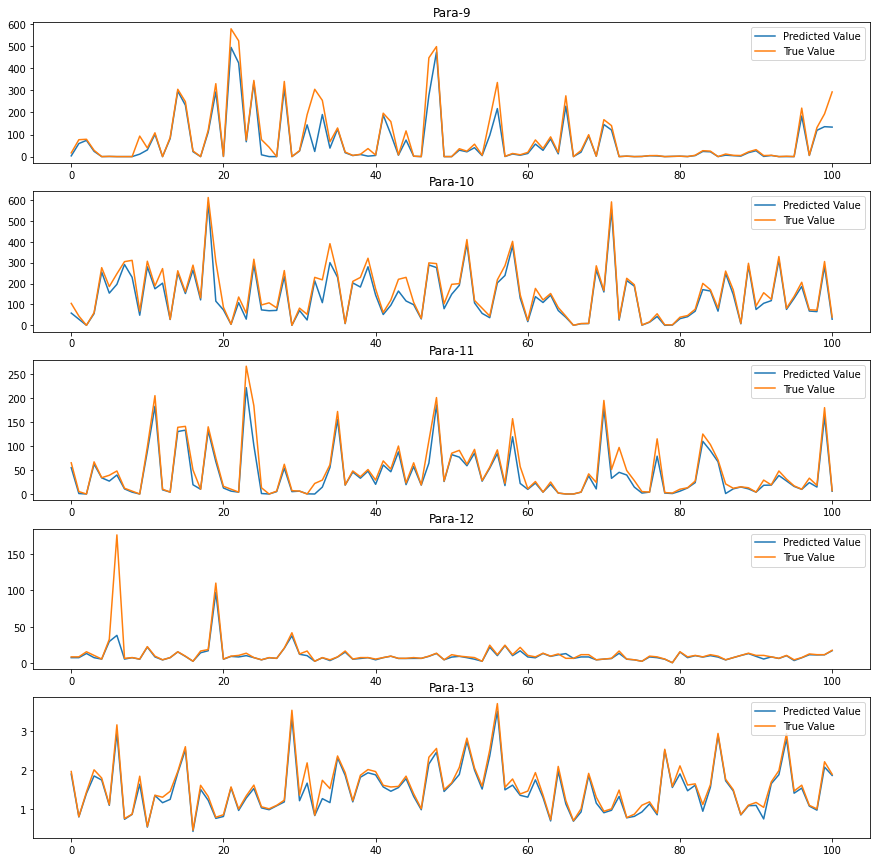

In [88]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

ax1 = plt.subplot(5,1,1)
ax1.plot(para9_pred)
ax1.plot(para9_act)
ax1.set_title("Para-9")
ax1.legend(["Predicted Value","True Value"])

ax2 = plt.subplot(5,1,2)
ax2.plot(para10_pred)
ax2.plot(para10_act)
ax2.set_title("Para-10")
ax2.legend(["Predicted Value","True Value"])

ax3 = plt.subplot(5,1,3)
ax3.plot(para11_pred)
ax3.plot(para11_act)
ax3.set_title("Para-11")
ax3.legend(["Predicted Value","True Value"])

ax4 = plt.subplot(5,1,4)
ax4.plot(para12_pred)
ax4.plot(para12_act)
ax4.set_title("Para-12")
ax4.legend(["Predicted Value","True Value"])

ax5 = plt.subplot(5,1,5)
ax5.plot(para13_pred)
ax5.plot(para13_act)
ax5.set_title("Para-13")

ax5.legend(["Predicted Value","True Value"])

plt.show()

In [80]:
def scatterd_plot(act,pred,titl):
    fig, ax = plt.subplots()
    ax.scatter(act,pred)
    ax.plot([min(act), max(act)], [min(act), max(act)], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(titl)
    plt.show()

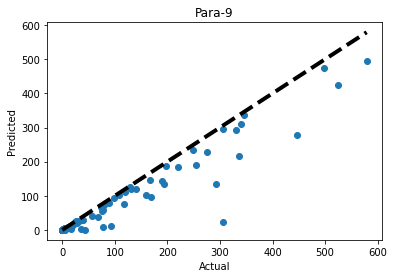

In [81]:
scatterd_plot(para9_act, para9_pred,'Para-9')

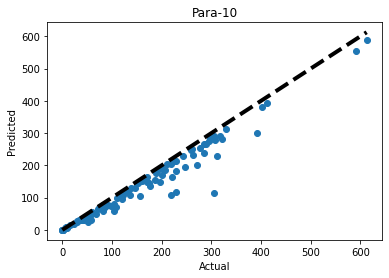

In [82]:
scatterd_plot(para10_act, para10_pred,'Para-10')

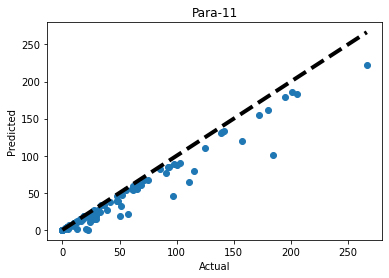

In [83]:
scatterd_plot(para11_act, para11_pred,'Para-11')

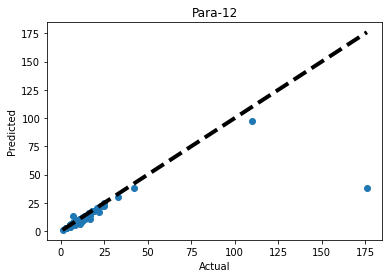

In [84]:
scatterd_plot(para12_act, para12_pred,'Para-12')

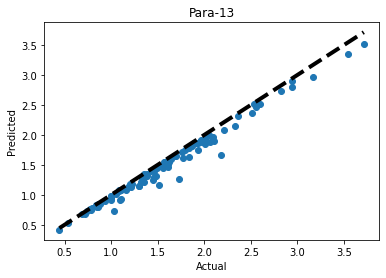

In [85]:
scatterd_plot(para13_act, para13_pred,'Para-13')

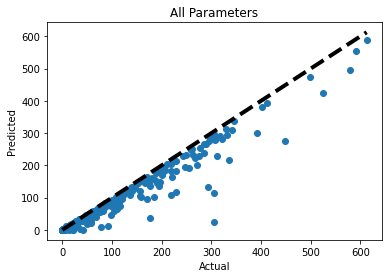

In [89]:
scatterd_plot(total_act, total_pred,'All Parameters')